In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun, G
import astropy.units as u
import tqdm
from matplotlib import colors 

sys.path.append('../my_funcs/')
from pipeline_main import pipeline
from pipeline_streamers import infall_sphere 


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

In [2]:
datai = pipeline(snap = 402, run = 'sink161core01', sink_id = 161)
data = pipeline(snap = 520, run = 'sink161core01', sink_id = 161)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 3851/3851 [00:18<00:00, 204.28it/s]


Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 3851/3851 [00:13<00:00, 294.47it/s]


In [3]:
data.sink_evolution(start = 402)

Loading all snapshots - this might take awhile


 38%|███▊      | 45/119 [06:43<08:48,  7.15s/it]


timer:
       snapshot metadata:   0.125 sec
          patch metadata:  15.525 sec
            add-idx-attr:   0.226 sec
          llc-urc-extent:   0.121 sec
                    _var:   0.246 sec
            _add_axes(1):   0.224 sec


 63%|██████▎   | 75/119 [11:49<04:48,  6.56s/it]


timer:
          patch metadata:   1.807 sec
                    _var:  14.523 sec
            _add_axes(1):   0.222 sec
            _add_axes(2):   0.133 sec


 77%|███████▋  | 92/119 [14:25<03:02,  6.76s/it]


timer:
          patch metadata:   1.746 sec
            add-idx-attr:   0.152 sec
                    _var:  17.756 sec
            _add_axes(1):   0.189 sec


 95%|█████████▍| 113/119 [17:45<00:53,  8.87s/it]


timer:
          patch metadata:   1.809 sec
                    _var:  21.034 sec


100%|██████████| 119/119 [18:52<00:00,  9.52s/it]


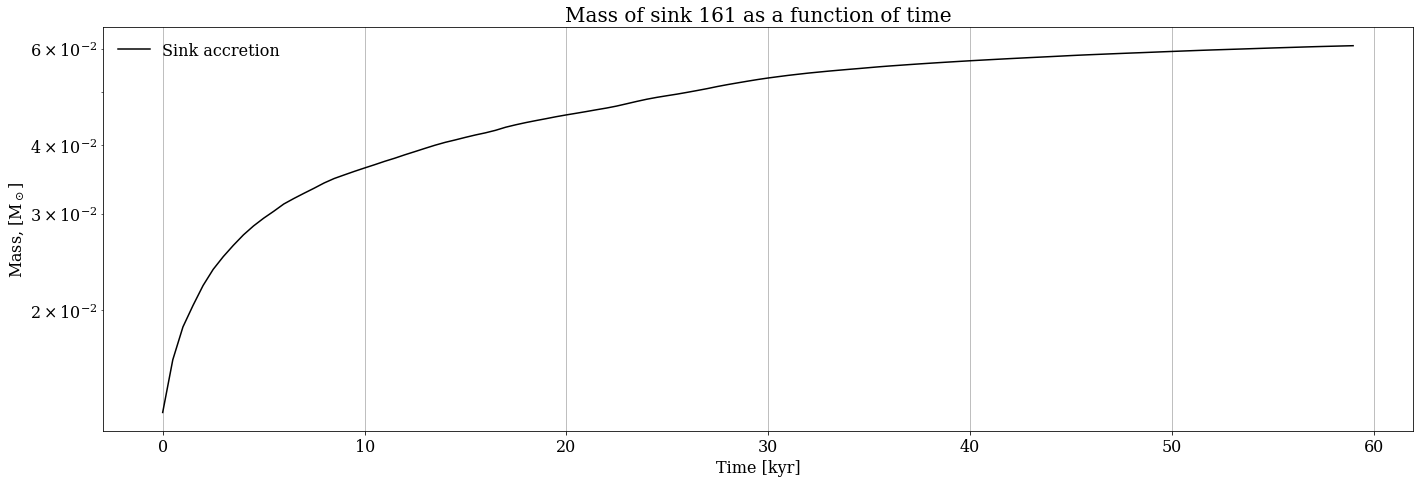

In [17]:
fig, axs = plt.subplots(figsize = (20, 7))

axs.grid('--')
axs.semilogy((data.t_eval - datai.time)*1e-3, data.sink_mass, '-', markersize = 3, c = 'black', label = 'Sink accretion'); 
axs.set_xlabel('Time [kyr]', fontsize=16); axs.set_ylabel('Mass, [M$_\odot$]', fontsize=16); axs.set_title('Mass of sink 161 as a function of time', fontsize = 20)
plt.legend(frameon = False)
plt.tight_layout()

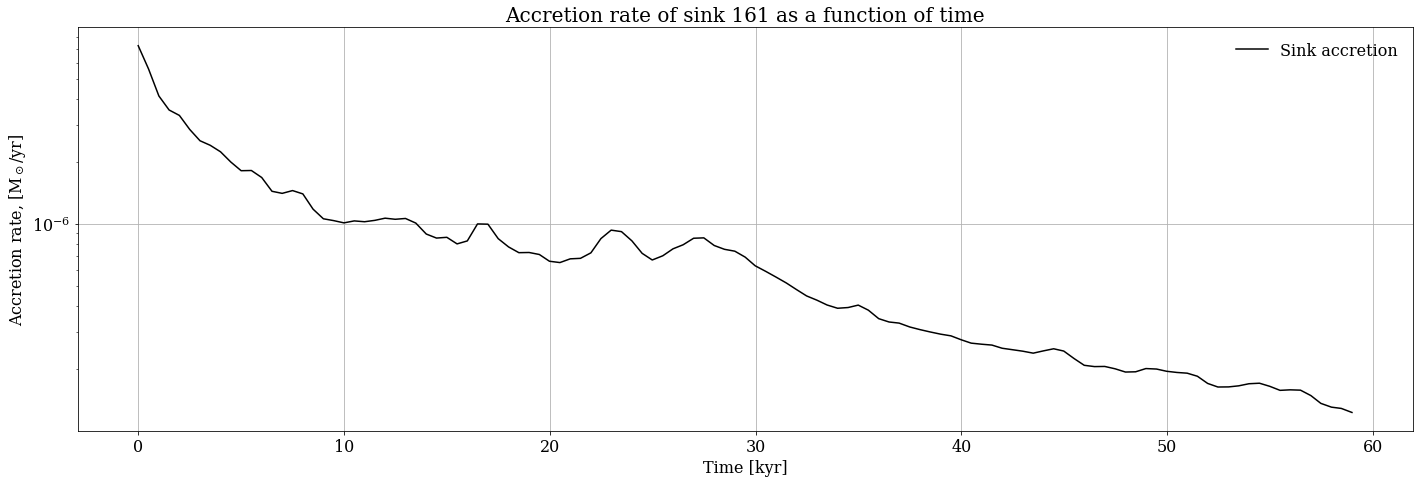

In [5]:
fig, axs = plt.subplots(figsize = (20, 7))

axs.grid('--')
axs.semilogy((data.t_eval - datai.time)*1e-3, data.sink_accretion, '-', markersize = 3, c = 'black', label = 'Sink accretion'); 
axs.set_xlabel('Time [kyr]', fontsize=16); axs.set_ylabel('Accretion rate, [M$_\odot$/yr]', fontsize=16); axs.set_title('Accretion rate of sink 161 as a function of time', fontsize = 20)
plt.legend(frameon = False)
plt.tight_layout()

In [16]:
np.sum((data.star_pos - np.array([-0.27888971,-0.43589206,-0.47605298]))**2)**0.5 * data.au_length

2220.2332831377003

In [13]:
data.star_vel

array([ 0.00119066,  0.00036974, -0.00425679])

In [14]:
ramses_pos = np.array([0.22111029   ,  0.064107940 ,    0.023947020])

In [15]:
ramses_pos - 0.5

array([-0.27888971, -0.43589206, -0.47605298])